# Logistic Regression Model

- The model has been implemented from the scratch using the libraries **NumPy** and **Matplotlib**.

In [1]:
from google.colab import files
files.upload()

Saving logistic_regression.py to logistic_regression (1).py


{'logistic_regression (1).py': b'\'\'\' Logistic Regression Model \'\'\'\r\n\r\n# Importing necessary libraries\r\nimport numpy as np\r\nimport matplotlib.pyplot as plt\r\n\r\nclass LogisticRegression():\r\n    # Initializing some useful variables\r\n    def __init__(self,lr=0.5,lamda=1e-4,num_iters=500):\r\n        \'\'\' \'__init__\' takes arguments as Learning Rate(lr), Regularization Constant(lamda), Number of Iterations(num_iters)\'\'\'\r\n        # All these parameters have been initialized by their default values, they can be changed when required\r\n        self.lr = lr\r\n        self.lamda = lamda\r\n        self.num_iters = num_iters\r\n\r\n    \'\'\' Feature scaling using Standardization Technique \'\'\'\r\n    def feature_scale(self,X):\r\n        for i in range(X.shape[1]):\r\n            X[:,i] = (X[:,i] - np.mean(X[:,i])) / (np.std(X[:,i]) + 1e-5)\r\n        return X\r\n\r\n    \'\'\' Sigmoid function maps all the values in the range of 0 to 1 \'\'\'\r\n    def sigmoid(

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Importing, splitting and assigning the training data
train_dataset = pd.read_csv('/content/sample_data/mnist_train_small.csv',header=None)
Xtrain = np.array(train_dataset.iloc[:,1:])
ytrain = np.array(train_dataset.iloc[:,0:1])

#Importing, splitting and assigning the testing data
test_data = pd.read_csv('sample_data/mnist_test.csv', header=None)
Xtest = np.array(test_data.iloc[:,1:])
ytest = np.array(test_data.iloc[:,0:1])

In [4]:
train_samples = Xtrain.shape[0]
test_samples = Xtest.shape[0]
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

(20000, 784) (20000, 1)
(10000, 784) (10000, 1)


In [5]:
num_class = len(np.unique(ytrain))
print(num_class)

10


In [6]:
from logistic_regression import LogisticRegression

In [7]:
model = LogisticRegression(lr=0.6,lamda=1e-2,num_iters=200)
# Takes Xtrain, ytrain and num_class as its arguments and update the weights
model.fit(Xtrain,ytrain,num_class)

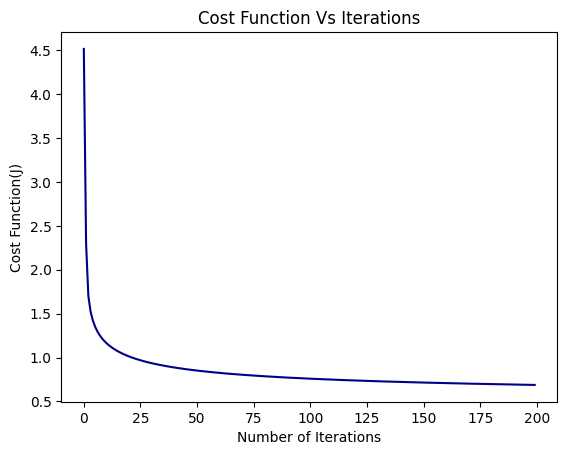

In [8]:
model.plot() # Plotting (Cost Function vs Iterations)

In [9]:
ypred = model.predict(Xtrain)
print('Training Data Accuracy : ',model.accuracy(ytrain,ypred))
ytpred = model.predict(Xtest)
print('Testing Data Accuracy : ',model.accuracy(ytest,ytpred))

Training Data Accuracy :  91.545
Testing Data Accuracy :  90.05


## Plot between expected and predicted output

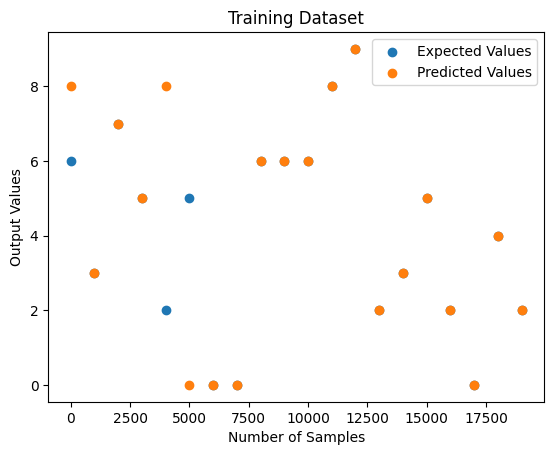

In [10]:
# Training Dataset
plt.scatter(list(range(0,train_samples,1000)),ytrain[0:train_samples:1000,:],label="Expected Values")
plt.scatter(list(range(0,train_samples,1000)),ypred[0:train_samples:1000,:],label="Predicted Values")
plt.xlabel("Number of Samples")
plt.ylabel("Output Values")
plt.title("Training Dataset")
plt.legend()
plt.show()

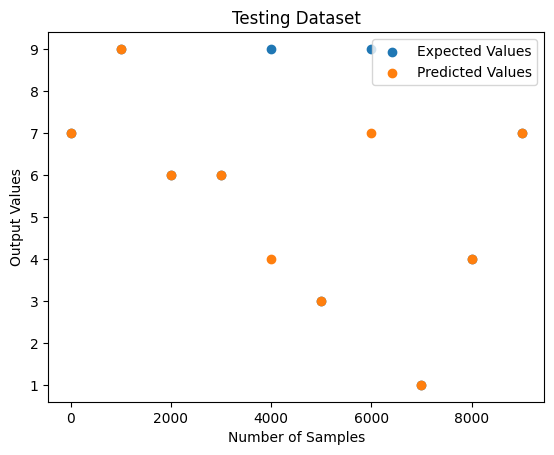

In [11]:
# Testing Dataset
plt.scatter(list(range(0,test_samples,1000)),ytest[0:test_samples:1000,:],label="Expected Values")
plt.scatter(list(range(0,test_samples,1000)),ytpred[0:test_samples:1000,:],label="Predicted Values")
plt.xlabel("Number of Samples")
plt.ylabel("Output Values")
plt.title("Testing Dataset")
plt.legend()
plt.show()

## Logistic Regression using scikit-learn

In [12]:
# Logistic Regression using scikit learn.
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

sk_model = LogisticRegression()

# Applying feature scaling by standardzing the data.
scaler = StandardScaler()
Xtrain = scaler.fit(Xtrain).transform(Xtrain)
Xtest = scaler.fit(Xtest).transform(Xtest)

# Converting the 'y' array into a 1D list
ytrain = ytrain.ravel()
ytest = ytest.ravel()

# Takes Xtrain, ytrain(Training data) and updates parameters.
sk_model.fit(Xtrain,ytrain)

# Calculates and prints accuracy of trained model with training, testing data.
print('Sklearn Training Accuracy : ', sk_model.score(Xtrain,ytrain)*100)
print('Sklearn Testing Accuracy : ', sk_model.score(Xtest,ytest)*100)

Sklearn Training Accuracy :  97.175
Sklearn Testing Accuracy :  88.3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
